In [1]:
#https://www.youtube.com/playlist?list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v

Regression - Continuous data, best fit line to that data (linear = straight line)
y=mx+b

## Develop features

In [137]:
import pandas as pd
import quandl

In [17]:
df_quandl = quandl.get('WIKI/GOOGL')

In [138]:
display(df_quandl.head())

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [139]:
#remove columns
df = df_quandl[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]

#Add high:low percentage
df['HL_PCT'] = (df['Adj. High']-df['Adj. Low'])/df['Adj. Close'] * 100.0
#Add daily change
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume',]]

C:\Users\mattt_000\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\mattt_000\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [140]:
display(df.head())

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0
2004-08-20,54.322689,7.921706,7.227007,22834300.0
2004-08-23,54.869377,4.049360,-1.227880,18256100.0
2004-08-24,52.597363,7.657099,-5.726357,15247300.0
2004-08-25,53.164113,3.886792,1.183658,9188600.0


## Decide on a label

In [141]:
import quandl, math
import pandas as pd

In [142]:
forecast_col = 'Adj. Close'

In [143]:
df.fillna(-99999,inplace=True)

In [144]:
#Number of points to forecast
#forecast_out = int(math.ceil(0.1*len(df)))
forecast_out = 30
print(f'{forecast_out} days')

30 days


In [145]:
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
display(df.head())

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,66.495265
2004-08-20,54.322689,7.921706,7.227007,22834300.0,67.739104
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,69.399229
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,68.752232
2004-08-25,53.164113,3.886792,1.183658,9188600.0,69.639972


In [146]:
display(df.tail())

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-02-06,1084.43,5.290337,4.879205,3732527.0,1094.00
2018-02-07,1055.41,3.023470,-2.724499,2544683.0,1053.15
2018-02-08,1005.60,5.848250,-5.120439,3067173.0,1026.55
2018-02-09,1043.43,5.244243,1.710726,4436032.0,1054.09
2018-02-12,1054.56,1.904112,-0.199684,2796258.0,1006.94


## Training and Testing

### Linear regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [147]:
import numpy as np
from sklearn import preprocessing, svm #cross_validation (this is depreciated)
from sklearn import svm
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
#a_train, a_test, b_train, b_test = train_test_split(a, b,test_size=0.33, random_state=42)

In [148]:
#Features = X
#Label = y

In [149]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)

X_lately = X[-forecast_out:]
X = X[:-forecast_out]


df.dropna(inplace=True)

y = np.array(df['label'][:-forecast_out])

In [150]:
print(len(X))
print(len(y))

3364
3364


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [152]:
clf = LinearRegression()
clf.fit(X_train,y_train) #Train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [153]:
accuracy = clf.score(X_test,y_test) #Test the model
print (f'{accuracy}')

0.9802520082855465


In [154]:
forecast_set = clf.predict(X_lately)
display(forecast_set, accuracy, forecast_out)

array([1073.46003296, 1092.24289608, 1110.84804061, 1116.07998112,
       1130.56157219, 1134.79082101, 1133.33816933, 1130.71836893,
       1132.51990575, 1150.3573651 , 1150.79497104, 1159.61729937,
       1156.49588826, 1164.2602536 , 1184.35741648, 1197.24835337,
       1192.07914198, 1203.35114738, 1208.39981635, 1207.70325279,
       1198.42445946, 1203.34746803, 1202.1685842 , 1138.22470768,
       1085.82171579, 1100.91535475, 1073.98226515, 1022.06830982,
       1059.60920657, 1073.42014365])

0.9802520082855465

30

## Graph the predictions

In [119]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [120]:
df['Forecast'] = np.nan

In [122]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [123]:
for i in forecast_set:
    #iterate through forecast set
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

<IPython.core.display.Javascript object>


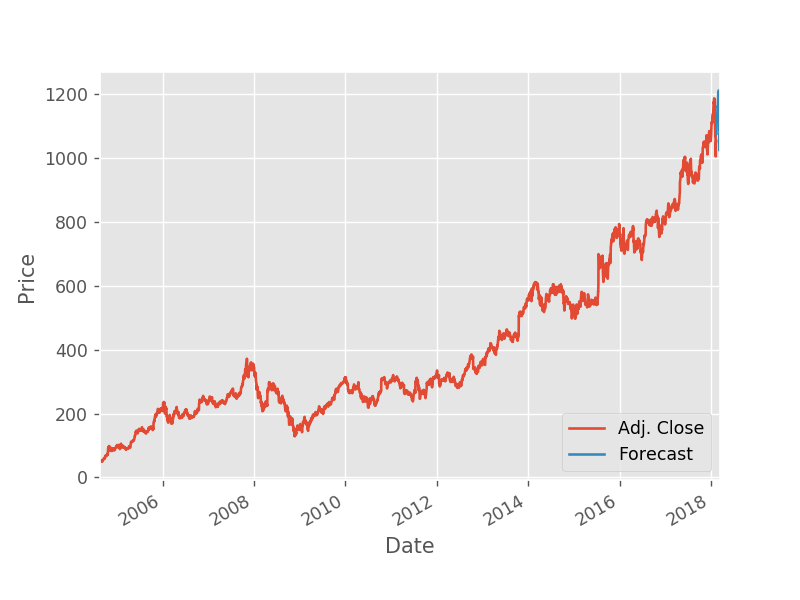

In [126]:
%matplotlib notebook

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Pickling a model

In [127]:
#Pickle is serialisation of a Python object

In [128]:
import pickle

In [155]:
#Save the trained model
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf,f)

In [156]:
#Load the saved model
pickle_in = open('linearregression.pickle','rb')
clf_loaded = pickle.load(pickle_in)

In [157]:
clf_loaded

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Write our own Linear Regression model

Must be continuous data

Is there a relationship between x&y? Yes/no.

When there isn't a relationship between x&y, Linear Regression is a waste of time.

Create a best fit line. y=mx+b -At any point along x, put x into formula and you get y.

y=mx+b. How to calculate m and b?

m = slope

b = y intercept

m(slope) = ( ( mean(x) * mean(y) ) - mean (x*y)) / (mean(x)^2 - mean(x^2))

b(y int) = mean(y) - (m * mean(x))

This is just 2d data (x and y), higher dimensions is more complex

In [158]:
from statistics import mean
import numpy as np

In [164]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)


<IPython.core.display.Javascript object>


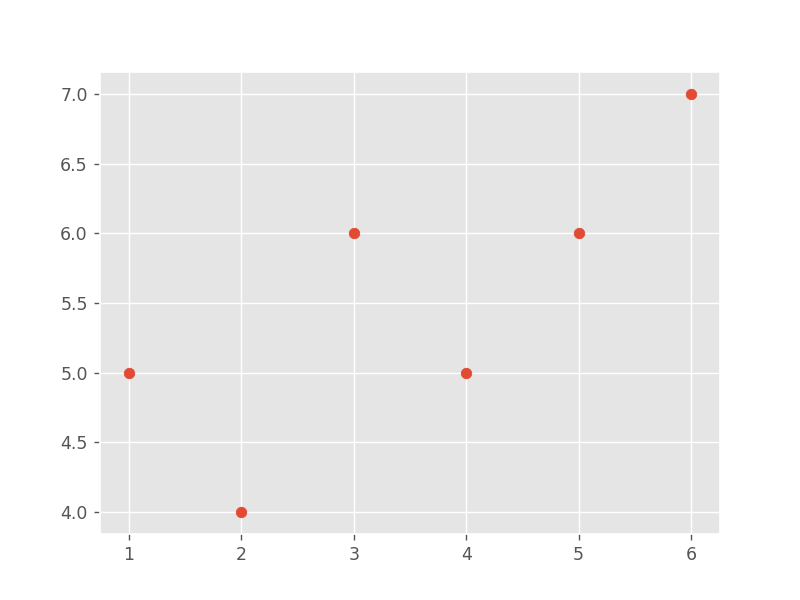

In [165]:
import matplotlib.pyplot as plt

%matplotlib notebook
plt.scatter(xs,ys)
plt.show()

In [180]:
def best_fit_slope_intercept(xs,ys):
    numerator = ((mean(xs)*mean(ys)) - mean(xs*ys))
    denominator = ((mean(xs)**2) - mean (xs*xs))
    
    b = mean(ys) - (m * mean(xs))
    
    return numerator/denominator, b

m,b = best_fit_slope_intercept(xs,ys)

In [181]:
display(m)
display(b)
print(f'y = {m}x + {b}')

0.42857142857142866

4.0

y = 0.42857142857142866x + 4.0


In [187]:
predict_x = 8
predict_y = (m*predict_x) + b

In [188]:
regression_line = [(m*x)+b for x in xs]

<IPython.core.display.Javascript object>


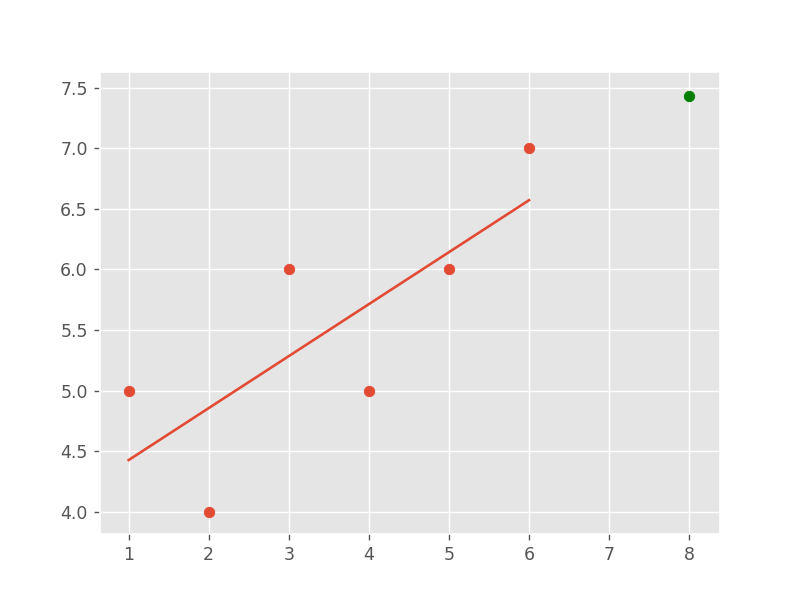

In [189]:
%matplotlib notebook
plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y, color='g')
plt.plot(xs,regression_line)
plt.show()

## R Squared Theory

Determine accuracy using "R Squared". Also known as The Coeffecient of Determination.

Calculated using squared error.

Error is the distance between the point and the best fit line. Squared. We square it because the distance can be negative and positive. Also if there are outliers, we want to penalise for outliers. You can use a bigger power, if you want to penalise for outliers more.

r2 = 1 - SE(y^)/SE*mean(y)

This is comparing how much more accurate the best fit line is to the mean of the ys.

From 0 to 1.

In [190]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)

In [191]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1-(squared_error_regr / squared_error_y_mean)

In [198]:
r_squared = coefficient_of_determination(ys,regression_line)
display(f'r squared = {r_squared}')

'r squared = 0.5844155844155845'

## Testing with sample data

In [199]:
import random

In [203]:
def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    
    return np.array(xs,dtype=np.float64), np.array(ys,dtype=np.float64)

<IPython.core.display.Javascript object>


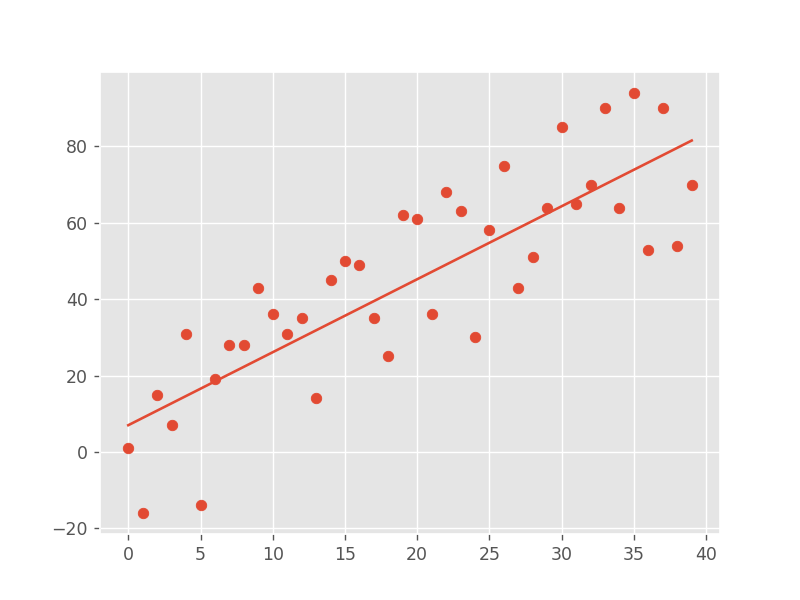

In [239]:
xs, ys = create_dataset(40,25,2,correlation='pos')
m,b = best_fit_slope_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

%matplotlib notebook
plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.show()

In [240]:
r_squared = coefficient_of_determination(ys,regression_line)
display(f'r squared = {r_squared}')

'r squared = 0.6898887134848364'